<a href="https://colab.research.google.com/github/MingyuKIM615/ITWILL_PYTHON/blob/master/ml08_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

## 이진 분류(binary classification)

* 생선의 종류들 중에서 도미(Bream)와 빙어(Smelt)를 분류
* 생선의 모든 특성(Length, Diagonal, Height, width)를 사용

In [ ]:
# Bream과 Smelt로 이루어진 데이터 프레임
df = fish[fish['Species'].isin(['Bream', 'Smelt'])]

In [ ]:
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
df.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [ ]:
X = df.iloc[:, 1:].values # 특성 행렬(2차원 배열)
y= df['Species'].values   # 타겟 배열

In [ ]:
X[:5,:]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
X.shape, y.shape

((49, 5), (49,))

# 훈련 셋, 테스트 셋

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
X_train.shape, X_test.shape

((39, 5), (10, 5))

In [ ]:
y_train.shape, y_test.shape

((39,), (10,))

In [ ]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([28, 11]))

In [ ]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([7, 3]))

# KNN Classifier

In [ ]:
scaler = StandardScaler()
clf = KNeighborsClassifier()
knn_model = Pipeline(steps=[('scaler', scaler), ('clf', clf)]) # 모델 생성

In [ ]:
knn_model.fit(X_train, y_train) # 모델 훈련

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

## 훈련 셋 평가

In [ ]:
# 훈련 셋 예측값
knn_train_pred = knn_model.predict(X_train)
print(knn_train_pred)

['Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream']


In [ ]:
# 훈련 셋 실젯값
print(y_train)

['Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream']


In [ ]:
confusion_matrix(y_train, knn_train_pred)

array([[28,  0],
       [ 0, 11]])

In [ ]:
print(classification_report(y_train, knn_train_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        28
       Smelt       1.00      1.00      1.00        11

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



## 테스트 셋 평가

In [ ]:
knn_test_pred = knn_model.predict(X_test)
print(knn_test_pred)

['Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Bream']


In [ ]:
# 테스트 셋 실젯값
print(y_test)

['Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Bream']


In [ ]:
confusion_matrix(y_test, knn_test_pred)

array([[7, 0],
       [0, 3]])

In [ ]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
       Smelt       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Logistic Regression

## 모델 생성

In [ ]:
scaler = StandardScaler()
clf = LogisticRegression()
logit_model = Pipeline(steps=[('scaler', scaler), ('clf', clf)])

## 모델 훈련

In [ ]:
logit_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

## 훈련 셋에서 모델 평가

In [ ]:
logit_train_pred = logit_model.predict(X_train) # 훈련 셋 예측값

In [ ]:
confusion_matrix(y_train, logit_train_pred)

array([[28,  0],
       [ 0, 11]])

## 테스트 셋에서 모델 평가

In [ ]:
logit_test_pred = logit_model.predict(X_test) # 테스트 셋 예측값

In [ ]:
print(logit_test_pred)

['Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Bream']


In [ ]:
confusion_matrix(y_test, logit_test_pred)

array([[7, 0],
       [0, 3]])

In [ ]:
# Logistic Regression은 각 클래스로 분류가 될 확률(probability)을 계산해서 분류 예측을 하는 알고리즘.
logit_model.predict_proba(X_test)

array([[9.90960690e-01, 9.03931034e-03],
       [9.94320123e-01, 5.67987700e-03],
       [5.00458495e-02, 9.49954150e-01],
       [9.99481616e-01, 5.18384317e-04],
       [9.97495022e-01, 2.50497777e-03],
       [3.16773760e-02, 9.68322624e-01],
       [9.56001338e-02, 9.04399866e-01],
       [9.98456978e-01, 1.54302243e-03],
       [9.83451744e-01, 1.65482562e-02],
       [9.70261071e-01, 2.97389290e-02]])

# sigmoid 함수(logistic 함수)

$$
\phi(z) = \frac{e^z}{e^z + 1} = \frac{1}{1+e^{-z}}
$$

* sigmoid 함수의 리턴값은 0 ~ 1 사이 
    * sigmoid 함수의 리턴값을 확률로 생각할 수 있음.
    * sigmoid 함수의 리턴값이 0.5보다 크면 양성(positive), 그렇지 않으면 음성(negative)로 예측하는 분류 모델을 만들 수 있음.

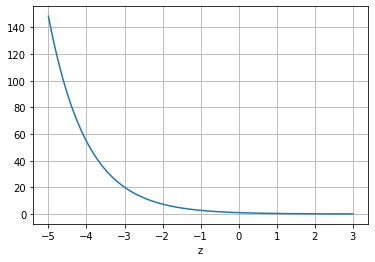

In [ ]:
# 지수 함수: f(z) = e^(-z)
z = np.arange(-5, 3, 0.001)
f = np.exp(-z)

plt.plot(z, f)
plt.grid()
plt.xlabel('z')
plt.show()

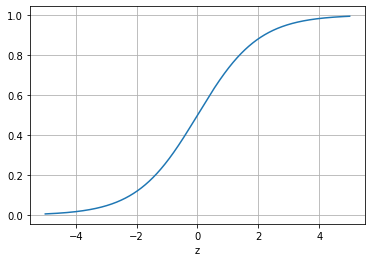

In [ ]:
# sigmoid 함수
z = np.arange(-5, 5, 0.001)
sigmoid = 1 / (1+ np.exp(-z))
plt.plot(z, sigmoid)
plt.grid()
plt.xlabel('z')
plt.show()

* 선형 회귀(Linear Regression)

$$
z = w_0 + w_1x_1 + w_2 x_2 +... = w_0 + \sum_j x_j \cdot w_j = w_0 + X\cdot w
$$

* Logistic Regression
    * 선형 회귀식으로 계산된 결과를 sigmoid 함수의 argument로 전달해서 양성/음성이 될 확률을 계산하는 알고리즘.
    * Logistic Regression에서 훈련 데이터로 학습시킨다는 의미는, sigmoid 함수에 사용할 선형 회귀식의 절편(intercept)과 계수들(coefficients)을 훈련 데이터를 사용해서 찾는다는 의미임.

$$
\phi(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(w_0 + \sum_j x_j \cdot w_j)}}
$$


In [ ]:
# Logistic Regression 훈련 결과로 찾은 계수들
print(logit_model.named_steps['clf'].intercept_) # 절편
print(logit_model.named_steps['clf'].coef_) # 계수들

[-2.68391743]
[[-0.56932547 -0.79994223 -0.83377816 -0.8684164  -0.8176118 ]]


# SGD(Stochastic Gradient Descent, 확률적 경사 하강법) Classification

SGD으로 찾은 선형 회귀식을 sigmoid(logistic) 함수의 argument로 전달해서 확률을 계산해서 분류를 하는 알고리즘.

In [ ]:
scaler = StandardScaler()
clf = SGDClassifier(loss='log', random_state=42)
#> 선형 회귀식을 logistic 함수에 전달해서 확률을 계산하기 위해서는 loss='log'이어야 함.
sgd_model= Pipeline(steps=[('scaler', scaler), ('clf', clf)])

In [ ]:
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SGDClassifier(loss='log', random_state=42))])

In [ ]:
# SGDClassifier의 훈련 결과 
print(sgd_model.named_steps['clf'].intercept_) # 절편 
print(sgd_model.named_steps['clf'].coef_) # 계수들

[-5.91050886]
[[-0.66553532 -2.02238221 -2.2416099  -2.51622721 -1.67928936]]


## 훈련 셋에서 모델 평가

In [ ]:
sgd_train_pred = sgd_model.predict(X_train) # 훈련 셋의 예측값

In [ ]:
sgd_train_pred[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Smelt'], dtype='<U5')

In [ ]:
sgd_train_prob = sgd_model.predict_proba(X_train) # 훈련 셋의 예측(도미가 될) 확률.
sgd_train_prob[:5]

array([[9.99986823e-01, 1.31767939e-05],
       [3.21371817e-04, 9.99678628e-01],
       [9.99928303e-01, 7.16969200e-05],
       [9.99998693e-01, 1.30653506e-06],
       [2.77411435e-03, 9.97225886e-01]])

In [ ]:
confusion_matrix(y_train, sgd_train_pred)

array([[28,  0],
       [ 0, 11]])

## 테스트 셋에서의 모델 평가

In [ ]:
sgd_test_pred = sgd_model.predict(X_test) # 테스트 셋 예측값
sgd_test_pred

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Smelt', 'Smelt',
       'Bream', 'Bream', 'Bream'], dtype='<U5')

In [ ]:
sgd_test_prob = sgd_model.predict_proba(X_test) # 테스트 셋 예측값
sgd_test_prob[:5]

array([[9.99977042e-01, 2.29581740e-05],
       [9.99993074e-01, 6.92636557e-06],
       [6.27236539e-04, 9.99372763e-01],
       [9.99999962e-01, 3.75930745e-08],
       [9.99998737e-01, 1.26279370e-06]])

In [ ]:
confusion_matrix(y_test, sgd_test_pred)

array([[7, 0],
       [0, 3]])